![CMCC](https://scontent.fcuz1-1.fna.fbcdn.net/v/t1.6435-9/169999414_134997141968151_5389622841264143457_n.jpg?_nc_cat=100&ccb=1-5&_nc_sid=09cbfe&_nc_eui2=AeGYHrPMueJlavl7eDql2QOI2St2L7MLFHTZK3YvswsUdPzk3Ovp__UvRhUQlcFyH2o&_nc_ohc=KZJCq4jFuhMAX9h5HUI&_nc_ht=scontent.fcuz1-1.fna&oh=00_AT_sGFdClC9xMtR4S8p-ilZYOR4ycFv1uCTqoKj-frAi8g&oe=61F5FE4C)
# **Spark + Python = PySpark**

#### Este notebook presenta los conceptos básicos de Spark a través de su interfaz de lenguaje Python. Como aplicación inicial usaremos el ejemplo clásico del contador de palabras. Con este ejemplo, puede comprender la lógica de programación funcional para las diversas tareas de exploración de datos distribuidos.

#### Para esto usaremos el libro de texto [Obras completas de William Shakespeare] (http://www.gutenberg.org/ebooks/100) obtenido del [Proyecto Gutenberg] (http://www.gutenberg.org/ wiki / Página_principal). Veremos que este mismo algoritmo se puede utilizar para textos de cualquier tamaño.

#### **Este notebook contiene:**
#### *Parte 1:* Creación de una base RDD y RDD de tupla
#### *Parte 2:* Manejo de RDD de tuplas
#### *Parte 3:* Encontrar palabras sueltas y calcular promedios
#### *Parte 4:* Aplicar el recuento de palabras a un archivo
#### *Parte 5:* Similitud entre objetos
#### Para los ejercicios es recomendable consultar la documentación de [PySpark API](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD)

##instalacion de pyspark colab


In [1]:
!pwd
!ls
!ls /usr/lib/jvm/
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!ls /usr/lib/jvm/
#descargar apache pyspark (CON LA ULTIMA VERSION DISPONIBLE)
!wget -q https://downloads.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar -xvzf spark-3.2.0-bin-hadoop3.2.tgz

!pip install -q findspark
!pip install pyspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

import findspark
findspark.init()

/content
sample_data
default-java  java-1.11.0-openjdk-amd64  java-11-openjdk-amd64
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Get:12 http://

### **Parte 1: Creación y manipulación de RDD**

#### En esta parte del notebook crearemos una base RDD a partir de una lista con el comando `parallelize`.

#### **(1a) Creando una base RDD**
#### Podemos crear una base de datos RDD de diferentes tipos y fuente Python con el comando `sc.parallelize (fuente, particiones)`, siendo fuente una variable que contiene los datos (ej .: una lista) y particiona el número de particiones trabajar en paralelo.

In [3]:
!pip install pyspark==3.0.1 py4j==0.10.9

     |████████████████████████████████| 204.2 MB 35 kB/s 
     |████████████████████████████████| 198 kB 68.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612246 sha256=e6ba47e8ed892642b6e381c4c6d8229374bac2cfee03d7495e404e110b23ef75
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.2
    Uninstalling py4j-0.10.9.2:
      Successfully uninstalled py4j-0.10.9.2
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.2.0
    Uninstalling pyspark-3.2.0:
      Successfully uninstalled pyspark-3.2.0


In [4]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
import findspark
findspark.init()
findspark.find()
import pyspark  

In [5]:
ListaPalavras = ['gato', 'elefante', 'rato', 'rato', 'gato']
palavrasRDD = sc.parallelize(ListaPalavras, 4)
print(type(palavrasRDD))

<class 'pyspark.rdd.RDD'>


#### **(1b) Plural**

#### Vamos a crear una función que transforme una palabra en plural agregando una letra 's' al final de la cadena. A continuación, usemos la función `map()` para aplicar la transformación a cada palabra del RDD.

#### En Python (y muchos otros lenguajes) la concatenación de cadenas es costosa. Una mejor alternativa es crear una nueva cadena usando [`str.format()`] (https://docs.python.org/2/library/string.html#format-string-syntax).

#### Nota: La cadena entre los conjuntos de tres comillas representa la documentación de la función. Esta documentación se muestra con el comando `help()`. Usaremos la estandarización de documentación sugerida para Python, mantendremos esta documentación en inglés.

In [6]:
# EXERCICIO
def Plural(palavra):
    """Adds an 's' to `palavra`.

    Args:
        palavra (str): A string.

    Returns:
        str: A string with 's' added to it.
    """
    return f"{palavra}s"
print(Plural('gato'))

gatos


In [7]:
help(Plural)

Help on function Plural in module __main__:

Plural(palavra)
    Adds an 's' to `palavra`.
    
    Args:
        palavra (str): A string.
    
    Returns:
        str: A string with 's' added to it.



In [8]:
assert Plural('rato')=='ratos', 'resultado incorreto!'
print ('OK')

OK


#### **(1c) Aplicar la función a RDD**
#### Pluralice cada palabra de nuestro RDD usando [map()] (http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.map)

#### A continuación, usaremos el comando [collect()] (http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.collect) que devuelve el RDD como una lista de Python.

In [9]:
# EXERCICIO
pluralRDD = palavrasRDD.map(Plural)
print (pluralRDD.collect())

['gatos', 'elefantes', 'ratos', 'ratos', 'gatos']


In [10]:
assert pluralRDD.collect()==['gatos','elefantes','ratos','ratos','gatos'], 'valores incorretos!'
print ('OK')

OK


#### **Nota:** use el comando `collect()` solo cuando esté seguro de que la lista cabe en la memoria. Para guardar los resultados en un archivo de texto o base de datos, usaremos otro comando.

#### **(1d) Usando una función `lambda`**
#### Repite la creación de un RDD plural, pero usando una función lambda.

In [11]:
# EXERCICIO
pluralLambdaRDD = palavrasRDD.map(lambda x: f"{x}s")
print (pluralLambdaRDD.collect())

['gatos', 'elefantes', 'ratos', 'ratos', 'gatos']


In [12]:
assert pluralLambdaRDD.collect()==['gatos','elefantes','ratos','ratos','gatos'], 'valores incorretos!'
print ('OK')

OK


#### **(1e) Tamaño de cada palabra**
#### Ahora usa `map()` y una función `lambda` para devolver el número de caracteres en cada palabra. Utilice `collect()` para almacenar el resultado como listas en la variable de destino.

In [13]:
# EXERCICIO
pluralTamanho = (pluralRDD
                 .map(lambda x:len(x))
                 .collect()
                 )
print (pluralTamanho)

[5, 9, 5, 5, 5]


In [14]:
assert pluralTamanho==[5,9,5,5,5], 'valores incorretos'
print ("OK")

OK


#### **(1f) RDD de pares y tuplas**

#### Para contar la frecuencia de cada palabra de forma distribuida, primero debemos asignar un valor a cada palabra en el RDD. Esto generará una base de datos (clave, valor). De esta forma podemos agrupar la base mediante la clave, calculando la suma de los valores asignados. En nuestro caso, asignemos el valor `1` a cada palabra.

#### Un RDD que contiene la estructura de tupla clave-valor `(k, v)` se denomina RDD de tupla o * RDD de par *.

#### Vamos a crear nuestro RDD a partir de pares usando la transformación `map ()` con una función `lambda ()`.

In [15]:
# EXERCICIO
palavraPar = palavrasRDD.map(lambda x: (x, 1))
print (palavraPar.collect())

[('gato', 1), ('elefante', 1), ('rato', 1), ('rato', 1), ('gato', 1)]


In [16]:
assert palavraPar.collect() == [('gato',1),('elefante',1),('rato',1),('rato',1),('gato',1)], 'valores incorretos!'
print ("OK")

OK


### **Parte 2: Manipulación de Tuplas RDD**

#### Manipulemos nuestro RDD para contar las palabras en el texto.

#### **(2a) Función `groupByKey ()`**

#### La función [groupByKey ()] (http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.groupByKey) agrupa todos los valores de un RDD por clave (primer elemento de la tupla) agregando los valores en una lista.

#### Este enfoque tiene una debilidad porque:
   + #### La operación requiere que los datos seccionados se muevan de forma masiva para que permanezcan en la partición correcta.
   + #### Las listas pueden llegar a ser muy largas. Imagínese contar todas las palabras en Wikipedia: términos comunes como "a", "e" formarán una lista enorme de valores que podrían no caber en la memoria del proceso esclavo.

In [17]:
# EXERCICIO
palavrasGrupo = palavraPar.groupByKey()
for chave, valor in palavrasGrupo.collect():
    valores = list(valor)
    print(f'{chave}: {valores}')

elefante: [1]
rato: [1, 1]
gato: [1, 1]


In [18]:
assert sorted(palavrasGrupo.mapValues(lambda x: list(x)).collect()) == [('elefante', [1]), ('gato',[1, 1]), ('rato',[1, 1])], 'Valores incorretos!'
print ("OK")

OK


#### **(2b) Cálculo de los recuentos**
#### Después de `groupByKey()` nuestro RDD contiene elementos compuestos por la palabra, como clave, y un iterador que contiene todos los valores correspondientes a esa clave.
#### Usando la transformación `map()` y la función `sum()`, construye un nuevo RDD que consta de tuplas (clave, suma).

In [19]:
# EXERCICIO
contagemGroup = palavrasGrupo.map(lambda x:(x[0],sum(x[1])))
print (contagemGroup.collect())

[('elefante', 1), ('rato', 2), ('gato', 2)]


In [20]:
assert sorted(contagemGroup.collect())==[('elefante',1), ('gato',2), ('rato',2)], 'valores incorretos!'
print ("OK")

OK


#### **(2c) `reduceByKey`**
#### Un comando más interesante para contar es [reduceByKey ()] (http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.reduceByKey) que crea un nuevo RDD de tuplas.

#### Esta transformación aplica la transformación `reduce()` vista en la lección anterior a los valores de cada clave. De esta manera, la función de transformación puede aplicarse a cada partición local y luego enviarse para la redistribución de la partición, reduciendo la cantidad de datos que se mueven y no manteniendo grandes listas en la memoria.

In [21]:
# EXERCICIO
contagem = palavraPar.reduceByKey(lambda x,y:x+y)
print( contagem.collect())

[('elefante', 1), ('rato', 2), ('gato', 2)]


In [22]:
assert sorted(contagem.collect())==[('elefante',1), ('gato',2), ('rato',2)], 'valores incorretos!'
print ("OK")

OK


#### **(2d) Comandos de agrupación**

#### La forma más común de realizar esta tarea, a partir de nuestras RDD RDDwords, es encadenar el mapa y los comandos reduceByKey en una línea de comando.

In [23]:
# EXERCICIO
contagemFinal = (palavrasRDD
                 .map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
                 .collect())
print (contagemFinal)

[('elefante', 1), ('rato', 2), ('gato', 2)]


In [24]:
assert sorted(contagemFinal)==[('elefante',1), ('gato',2), ('rato',2)], 'valores incorretos!'
print ("OK")

OK


### **Parte 3: Encontrar las palabras únicas y calcular el recuento promedio**

#### **(3a) Palabras únicas**

#### Calcula el número de palabras únicas en RDD. Utilice la misma canalización que antes pero reemplazando `.collect()` con otro método de API RDD.

In [25]:
# EXERCICIO
palavrasUnicas = palavrasRDD.distinct().count()
print (palavrasUnicas)

3


In [26]:
assert palavrasUnicas==3, 'valor incorreto!'
print ("OK")

OK


#### **(3b) Cálculo del recuento promedio de palabras**

#### Encuentra la frecuencia promedio de palabras usando RDD `count`.

#### Tenga en cuenta que la función de comando `reduce()` se aplica a cada tupla de RDD. Para realizar la suma de los recuentos, primero es necesario mapear el RDD a un RDD que contenga solo los valores de frecuencia (sin las claves).

In [27]:
# EXERCICIO
# add é equivalente a lambda x,y: x+y
from operator import add
total = (contagem
         .map(lambda x: x[1])
         .reduce(add)) 
media = total / float(palavrasUnicas)
print (total)
print (round(media, 2))

5
1.67


In [28]:
assert round(media, 2)==1.67, 'valores incorretos!'
print ("OK")

OK


### **Parte 4: Aplicar nuestro algoritmo a un archivo**

#### ** (4a) Función `contaPalavras` **

#### Para aplicar nuestro algoritmo genéricamente a múltiples RDD, primero creemos una función para aplicarla a cualquier fuente de datos. Esta función recibe la entrada de un RDD que contiene una lista de claves (palabras) y devuelve un RDD de tuplas con las claves y su recuento en ese RDD

In [29]:
# EXERCICIO
def contaPalavras(chavesRDD):
    """Creates a pair RDD with word counts from an RDD of words.

    Args:
        chavesRDD (RDD of str): An RDD consisting of words.

    Returns:
        RDD of (str, int): An RDD consisting of (word, count) tuples.
    """
    return (chavesRDD
            .map(lambda x: (x, 1))
            .reduceByKey(lambda x, y: x + y))
print (contaPalavras(palavrasRDD).collect())

[('elefante', 1), ('rato', 2), ('gato', 2)]


In [30]:
assert sorted(contaPalavras(palavrasRDD).collect())==[('elefante',1), ('gato',2), ('rato',2)], 'valores incorretos!'
print ("OK")

OK


#### ** (4b) Normalizando el texto **

#### Cuando trabajamos con datos reales, normalmente necesitamos estandarizar los atributos de tal manera que se ignoren las diferencias sutiles debidas a errores de medición o diferencias de estandarización. Para el siguiente paso, estandarizaremos el texto para:
   + #### Estandarizar las mayúsculas de las palabras (todas en mayúsculas o todas en minúsculas).
   + #### Eliminar puntuación.
   + #### Eliminar espacios al principio y al final de la palabra.
 
#### Crea una función `removerPontuacao` que convierte todo el texto a minúsculas, elimina los signos de puntuación y los espacios en blanco al principio o al final de la palabra. Para esto, use la biblioteca [re] (https://docs.python.org/2/library/re.html) para eliminar todo el texto que no sea letra, número o espacio, enlazando con las funciones de cadena para eliminar los espacios en blanco y convertir a minúsculas (consulte [Cadenas] (https://docs.python.org/2/library/stdtypes.html?highlight=str.lower#string-methods)).

In [31]:
# EXERCICIO
import re
def removerPontuacao(texto):
    """Removes punctuation, changes to lower case, and strips leading and trailing spaces.

    Note:
        Only spaces, letters, and numbers should be retained.  Other characters should should be
        eliminated (e.g. it's becomes its).  Leading and trailing spaces should be removed after
        punctuation is removed.

    Args:
        texto (str): A string.

    Returns:
        str: The cleaned up string.
    """
    return re.sub(r'[^A-Za-z0-9 ]', '', texto).strip().lower()
print (removerPontuacao('Ola, quem esta ai??!'))
print (removerPontuacao(' Sem espaco e_sublinhado!'))

ola quem esta ai
sem espaco esublinhado


In [32]:
assert removerPontuacao(' O uso de virgulas, embora permitido, nao deve contar. ')=='o uso de virgulas embora permitido nao deve contar', 'string incorreta!'
print ("OK")

OK


#### **(4c) Cargando archivo de texto**

#### Para la siguiente parte usaremos el libro [Obras completas de William Shakespeare] (http://www.gutenberg.org/ebooks/100) de [Proyecto Gutenberg] (http://www.gutenberg.org / wiki / Página_principal).

#### Para convertir un texto en un RDD, usamos la función `textFile()` que toma como entrada el nombre del archivo de texto que queremos usar y el número de particiones.

#### El nombre del archivo de texto puede hacer referencia a un archivo local o un URI de archivo distribuido (por ejemplo, hdfs: //).

#### Apliquemos también la función `removeScore()` para normalizar el texto y verifiquemos las primeras 15 líneas con el comando `take()`.



> cuando se trabaja en google colab lo unico seria subir el archivo pg100.txt entonces para abrir el archivo en codigo seria  solo direccionar `pg100.txt`
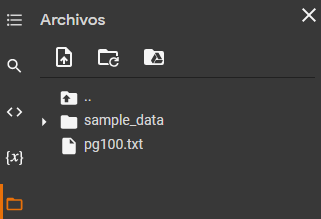


In [ ]:
# Apenas execute a célula
import os.path

arquivo = os.path.join('pg100.txt') 

# lê o arquivo com textFile e aplica a função removerPontuacao        
shakesRDD = (sc
             .textFile(arquivo, 8)
             .map(removerPontuacao)
             )

# zipWithIndex gera tuplas (conteudo, indice) onde indice é a posição do conteudo na lista sequencial
# Ex.: sc.parallelize(['gato','cachorro','boi']).zipWithIndex() ==> [('gato',0), ('cachorro',1), ('boi',2)]
# sep.join() junta as strings de uma lista através do separador sep. Ex.: ','.join(['a','b','c']) ==> 'a,b,c'
print ('\n'.join(shakesRDD
                .zipWithIndex()
                .map(lambda linha: '{0}: {1}'.format(linha[0],linha[1]))
                .take(15)
               ))

#### **(4d) Extrayendo las palabras**
#### Antes de que podamos usar nuestra función `contaPalavras()`, todavía tenemos que trabajar sobre nuestro RDD:
   + #### Necesitamos generar listas de palabras en lugar de listas de oraciones.
   + #### Eliminar líneas vacías.
 
#### Las cadenas de Python tienen el método [split ()] (https://docs.python.org/2/library/string.html#string.split) que separa una cadena por un separador. En nuestro caso, queremos separar las cadenas por espacio.

#### Usa la función `map()` para generar un nuevo RDD como lista de palabras.

In [ ]:
# EXERCICIO
shakesPalavrasRDD = shakesRDD.flatMap(lambda x: x.split(" "))
total = shakesPalavrasRDD.count()
print (shakesPalavrasRDD.take(5))
print (total)

['', 'project', 'gutenbergs', 'the', 'complete']
1009881


#### Como habrás notado, el uso de la función `map()` genera una lista para cada línea, creando un RDD que contiene una lista de listas.

#### Para resolver este problema, Spark tiene una función análoga llamada `flatMap ()` que aplica la transformación `map()`, pero *aplana* el retorno en forma de lista a una lista unidimensional.

In [ ]:
# EXERCICIO
shakesPalavrasRDD = shakesRDD.flatMap(lambda x: x.split())
total = shakesPalavrasRDD.count()
print (shakesPalavrasRDD.take(5))
print (total)

['project', 'gutenbergs', 'the', 'complete', 'works']
959359


In [ ]:
assert total==959359, "valor incorreto de palavras!"
print ("OK")
assert shakesPalavrasRDD.take(5)==['project', 'gutenbergs', 'the', 'complete', 'works'],'lista incorreta de palavras'
print ("OK")

OK
OK


#### Tenga en cuenta que `flatMap` ya ha eliminado las entradas vacías.

#### ** (4f) Número de palabras **
#### Ahora que nuestro RDD contiene una lista de palabras, podemos aplicar nuestra función `contaPalavras()`.

#### Aplica la función a nuestro RDD y usa la función `takeOrdered` para imprimir las 15 palabras más frecuentes.

#### `takeOrdered()` puede tomar un segundo parámetro que le dice a Spark cómo ordenar los elementos. Ex.:

#### `takeOrdered (15, key=lambda x: -x)`: orden descendente de valores x

In [ ]:
# EXERCICIO
top15 = contaPalavras(shakesPalavrasRDD).sortBy(lambda x: x[1], ascending=False).take(15) 
print ('\n'.join(map(lambda x: f'{x[0]}: {x[1]}', top15)))

the: 29996
and: 28353
i: 21860
to: 20885
of: 18811
a: 15992
you: 14439
my: 13191
in: 12027
that: 11782
is: 9711
not: 9068
with: 8521
me: 8271
for: 8184


In [ ]:
assert top15 == [('the', 29996), ('and', 28353), ('i', 21860), ('to', 20885), ('of', 18811), ('a', 15992), ('you', 14439), ('my', 13191), ('in', 12027), ('that', 11782), ('is', 9711), ('not', 9068), ('with', 8521), ('me', 8271), ('for', 8184)],'valores incorretos!'
print ("OK")

OK


### **Parte 5: Similaridad entre Objetos**

### En esta parte del laboratorio aprenderemos a calcular la distancia entre atributos numéricos, categóricos y textuales.

#### ** (5a) Vectores en el espacio euclidiano **

#### Cuando nuestros objetos están representados en el espacio euclidiano, medimos la similitud entre ellos a través de la *p-Norma* definida por:

#### $$d(x,y,p) = (\sum_{i=1}^{n}{|x_i - y_i|^p})^{1/p}$$

#### Las normas más utilizadas son $p=1,2,\infty$ que reducen en distancia absoluta, Euclidiana y distancia máxima:

#### $$d(x,y,1) = \sum_{i=1}^{n}{|x_i - y_i|}$$

#### $$d(x,y,2) = (\sum_{i=1}^{n}{|x_i - y_i|^2})^{1/2}$$

#### $$d(x,y,\infty) = \max(|x_1 - y_1|,|x_2 - y_2|, ..., |x_n - y_n|)$$

In [ ]:
import numpy as np

# Vamos criar uma função pNorm que recebe como parâmetro p e retorna uma função que calcula a pNorma
def pNorm(p):
    """Generates a function to calculate the p-Norm between two points.

    Args:
        p (int): The integer p.

    Returns:
        Dist: A function that calculates the p-Norm.
    """

    def Dist(x,y):
        return np.power(np.power(np.abs(x-y),p).sum(),1/float(p))
    return Dist

In [ ]:
# Vamos criar uma RDD com valores numéricos
np.random.seed(42)
numPointsRDD = sc.parallelize(enumerate(np.random.random(size=(10,100))))

In [ ]:
# EXERCICIO
# Procure dentre os comandos do PySpark, um que consiga fazer o produto cartesiano da base com ela mesma
cartPointsRDD = numPointsRDD.cartesian(numPointsRDD)

# Aplique um mapa para transformar nossa RDD em uma RDD de tuplas ((id1,id2), (vetor1,vetor2))
# DICA: primeiro utilize o comando take(1) e imprima o resultado para verificar o formato atual da RDD
cartPointsParesRDD = cartPointsRDD.map(lambda x: ((x[0][0],x[1][0]), (x[0][1],x[1][1])))


# Aplique um mapa para calcular a Distância Euclidiana entre os pares
Euclid = pNorm(2)
distRDD = cartPointsParesRDD.map(lambda x: (x[0], Euclid(x[1][0],x[1][1])))

# Encontre a distância máxima, mínima e média, aplicando um mapa que transforma (chave,valor) --> valor
# e utilizando os comandos internos do pyspark para o cálculo da min, max, mean
statRDD = distRDD.map(lambda x: x[1])

minv, maxv, meanv = statRDD.min(), statRDD.max(), statRDD.mean()
print (minv, maxv, meanv)

0.0 4.709048183663605 3.7511916889753705


In [ ]:
assert (minv.round(2), maxv.round(2), meanv.round(2))==(0.0, 4.71, 3.75), 'Valores incorretos'
print ("OK")

OK


#### ** (5b) Valores Categóricos **

#### Cuando nuestros objetos están representados por atributos categóricos, no tienen similitud espacial. Para calcular la similitud entre ellos podemos primero transformar nuestro vector de atributos en un vector binario indicando, para cada valor posible de cada atributo, si tiene ese atributo o no.

#### Con el vector binario podemos usar la distancia de Hamming definida por:

#### $$ H(x,y) = \sum_{i=1}^{n}{x_i != y_i} $$

#### También puedes establecer la distancia de Jaccard como:

#### $$ J(x,y) = \frac{\sum_{i=1}^{n}{x_i == y_i} }{\sum_{i=1}^{n}{\max(x_i, y_i}) } $$

In [ ]:
# Vamos criar uma função para calcular a distância de Hamming
def Hamming(x,y):
    """Calculates the Hamming distance between two binary vectors.

    Args:
        x, y (np.array): Array of binary integers x and y.

    Returns:
        H (int): The Hamming distance between x and y.
    """
    return (x!=y).sum()

# Vamos criar uma função para calcular a distância de Jaccard
def Jaccard(x,y):
    """Calculates the Jaccard distance between two binary vectors.

    Args:
        x, y (np.array): Array of binary integers x and y.

    Returns:
        J (int): The Jaccard distance between x and y.
    """
    return (x==y).sum()/float( np.maximum(x,y).sum() )

In [ ]:
# Vamos criar uma RDD com valores categóricos
catPointsRDD = sc.parallelize(enumerate([['alto', 'caro', 'azul'],
                             ['medio', 'caro', 'verde'],
                             ['alto', 'barato', 'azul'],
                             ['medio', 'caro', 'vermelho'],
                             ['baixo', 'barato', 'verde'],
                            ]))

In [ ]:
# EXERCICIO
# Crie um RDD de chaves únicas utilizando flatMap
chavesRDD = (catPointsRDD
             .flatMap(lambda x: [((x[0],xi),1) for xi in x[1]])
             .reduceByKey(lambda x,y: x)
             .map(lambda x: x[0])
             )

chaves = dict((v,k) for k,v in chavesRDD.collect())
nchaves = len(chaves)
print (chaves, nchaves)

{'alto': 2, 'caro': 0, 'baixo': 4, 'verde': 1, 'azul': 2, 'medio': 3, 'barato': 4, 'vermelho': 3} 8


In [ ]:
assert chaves=={'alto': 2, 'caro': 0, 'baixo': 4, 'verde': 1, 'azul': 2, 'medio': 3, 'barato': 4, 'vermelho': 3}, 'valores incorretos!'
print ("OK")

assert nchaves==8, 'número de chaves incorreta'
print ("OK")

OK
OK


In [ ]:
def CreateNP(atributos,chaves):  
    """Binarize the categorical vector using a dictionary of keys.

    Args:
        atributos (list): List of attributes of a given object.
        chaves (dict): dictionary with the relation attribute -> index

    Returns:
        array (np.array): Binary array of attributes.
    """
    
    array = np.zeros(len(chaves))
    for atr in atributos:
        array[ chaves[atr] ] = 1
    return array

# Converte o RDD para o formato binário, utilizando o dict chaves
binRDD = catPointsRDD.map(lambda rec: (rec[0],CreateNP(rec[1], chaves)))
binRDD.collect()

[(0, array([1., 0., 1., 0., 0., 0., 0., 0.])),
 (1, array([1., 1., 0., 1., 0., 0., 0., 0.])),
 (2, array([0., 0., 1., 0., 1., 0., 0., 0.])),
 (3, array([1., 0., 0., 1., 0., 0., 0., 0.])),
 (4, array([0., 1., 0., 0., 1., 0., 0., 0.]))]

In [ ]:
# EXERCICIO
# Procure dentre os comandos do PySpark, um que consiga fazer o produto cartesiano da base com ela mesma
cartBinRDD = binRDD.cartesian(binRDD)

# Aplique um mapa para transformar nossa RDD em uma RDD de tuplas ((id1,id2), (vetor1,vetor2))
# DICA: primeiro utilize o comando take(1) e imprima o resultado para verificar o formato atual da RDD
cartBinParesRDD = cartBinRDD.map(lambda x: ((x[0][0],x[1][0]), (x[0][1],x[1][1])))


# Aplique um mapa para calcular a Distância de Hamming e Jaccard entre os pares
hamRDD = cartBinParesRDD.map(lambda x: (x[0], Hamming(x[1][0],x[1][1])))
jacRDD = cartBinParesRDD.map(lambda x: (x[0], Jaccard(x[1][0],x[1][1])))

# Encontre a distância máxima, mínima e média, aplicando um mapa que transforma (chave,valor) --> valor
# e utilizando os comandos internos do pyspark para o cálculo da min, max, mean
statHRDD = hamRDD.map(lambda x: x[1])
statJRDD = jacRDD.map(lambda x: x[1])

Hmin, Hmax, Hmean = statHRDD.min(), statHRDD.max(), statHRDD.mean()
Jmin, Jmax, Jmean = statJRDD.min(), statJRDD.max(), statJRDD.mean()

print ("\t\tMin\tMax\tMean")
print ("Hamming:\t{:.2f}\t{:.2f}\t{:.2f}".format(Hmin, Hmax, Hmean ))
print ("Jaccard:\t{:.2f}\t{:.2f}\t{:.2f}".format( Jmin, Jmax, Jmean ))

		Min	Max	Mean
Hamming:	0.00	5.00	2.40
Jaccard:	0.60	4.00	1.90


In [ ]:
assert (Hmin.round(2), Hmax.round(2), Hmean.round(2)) == (0.00,5.00,2.40), 'valores incorretos'
print ("OK")
assert (Jmin.round(2), Jmax.round(2), Jmean.round(2)) == (0.60,4.00,1.90), 'valores incorretos'
print ("OK")

OK
OK
